In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:/Users/DELL/Desktop/dataset/hasan/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
print(data.shape)

(48842, 15)


In [5]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [7]:
info = pd.DataFrame()
info["IsNull"] = data.isnull().sum()
info["IsNa"] = data.isna().sum()
info["Duplicate"] = data.apply(lambda x: x.duplicated().sum())
info["Unique"] = data.apply(lambda x: x.nunique())
info["Min"] = data.select_dtypes(include=[np.number]).min()
info["Max"] = data.select_dtypes(include=[np.number]).max()

info = info.T
info

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
IsNa,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
Duplicate,48768.0,48833.0,20319.0,48826.0,48826.0,48835.0,48827.0,48836.0,48837.0,48840.0,48719.0,48743.0,48746.0,48800.0,48840.0
Unique,74.0,8.0,28523.0,16.0,16.0,7.0,14.0,6.0,5.0,2.0,123.0,99.0,96.0,41.0,2.0
Min,17.0,NaN,12285.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
Max,90.0,NaN,1490400.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,99999.0,4356.0,99.0,NaN,NaN


In [8]:
df = data.copy()
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

Text(0.5, 1.0, 'Histogram')

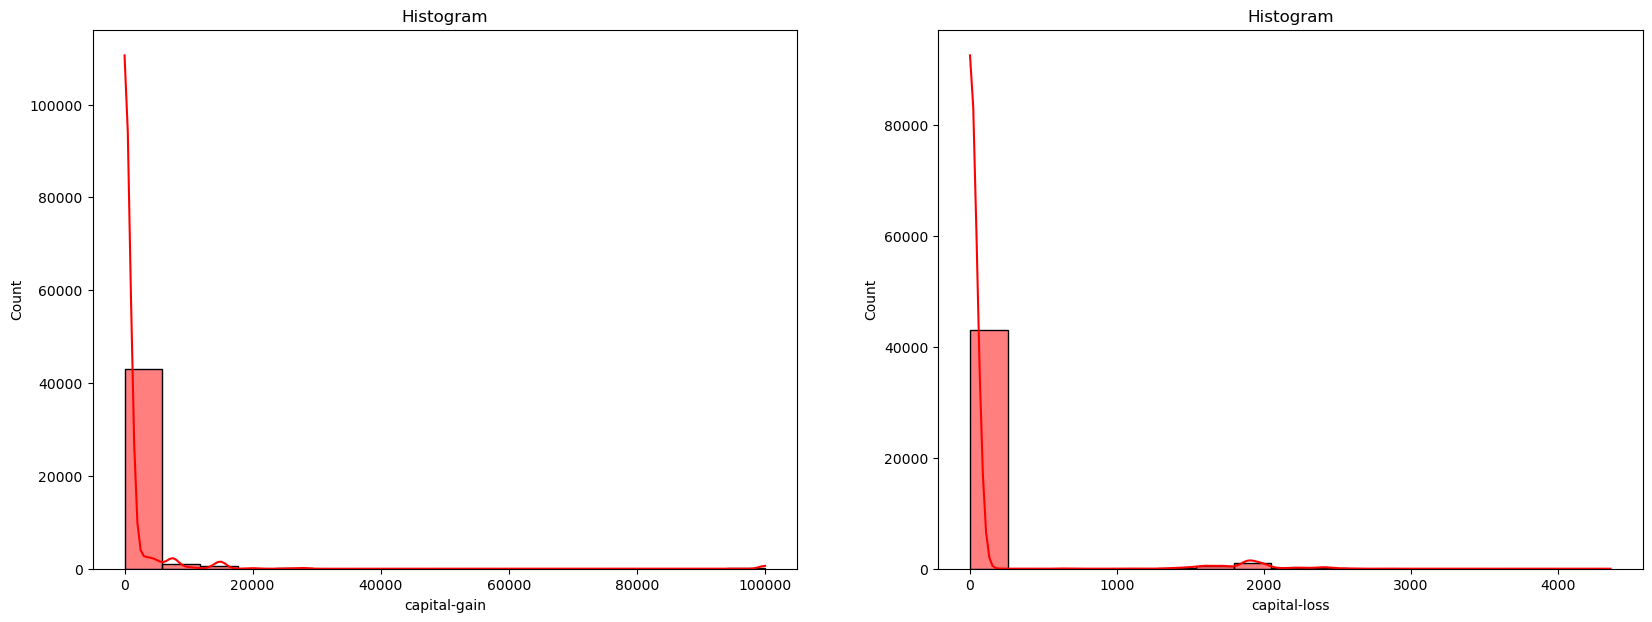

In [12]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

In [13]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['marital-status'] = label_encoder.fit_transform(df1['marital-status'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['relationship'] = label_encoder.fit_transform(df1['relationship'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])
df1['income'] = label_encoder.fit_transform(df1['income'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


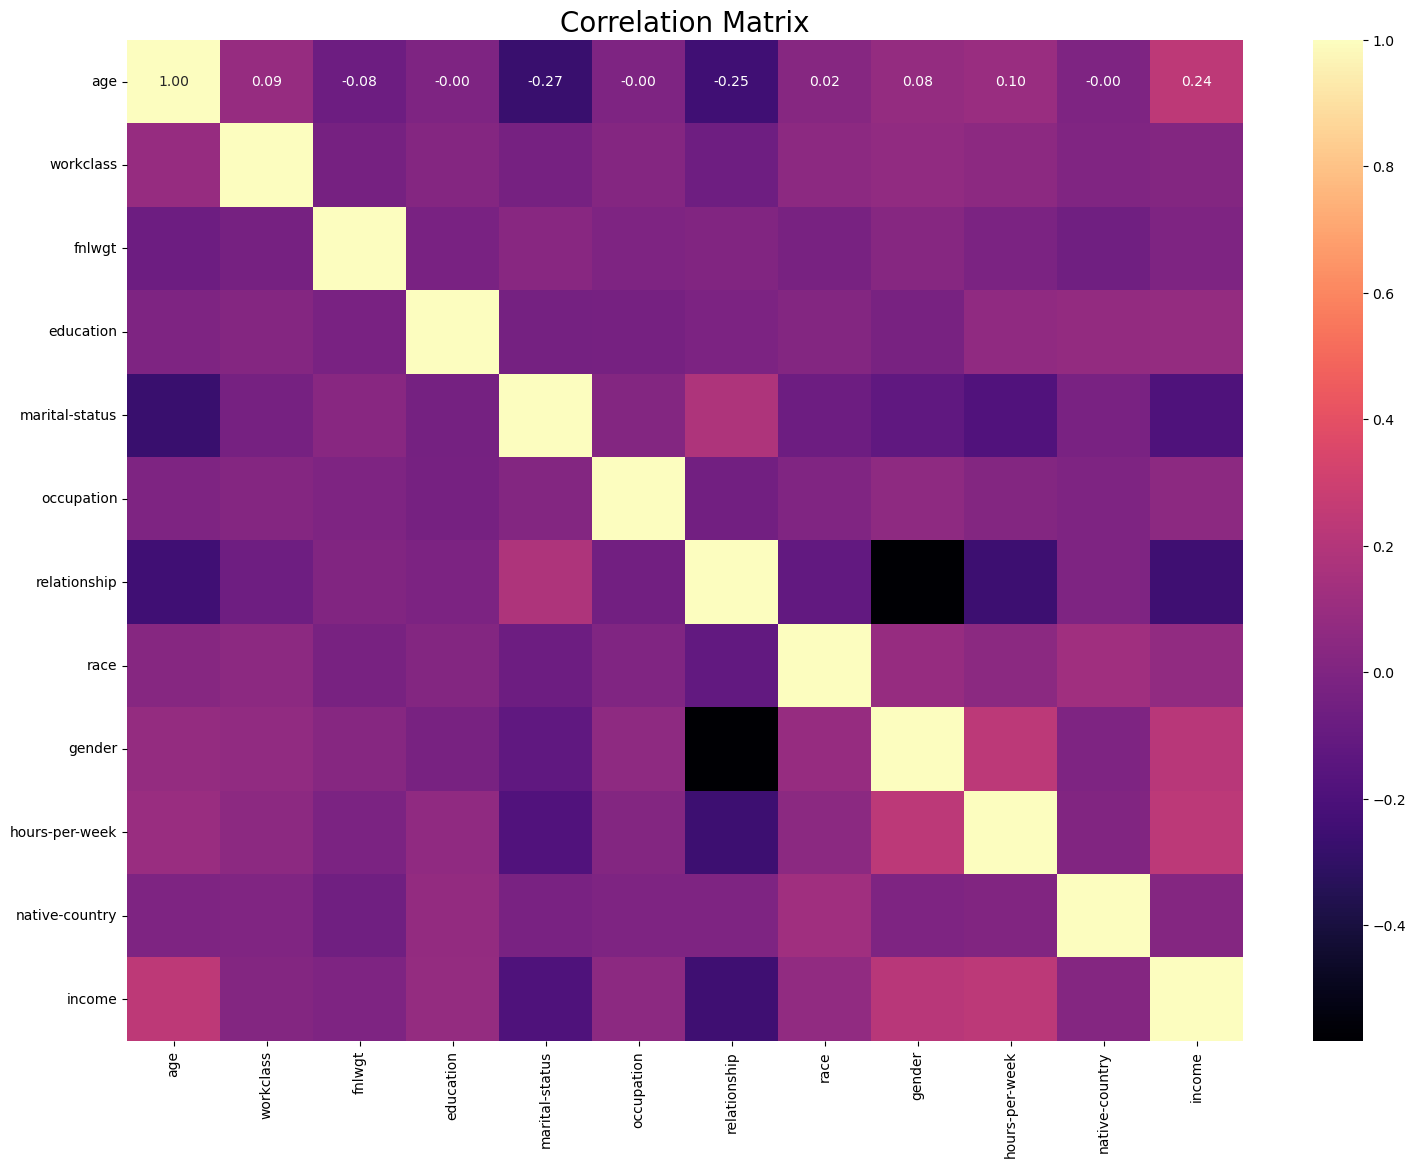

In [16]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [17]:
def diagnostic_plots(df, variable,target):
    
    plt.figure(figsize=(20, 7))

    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')

    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

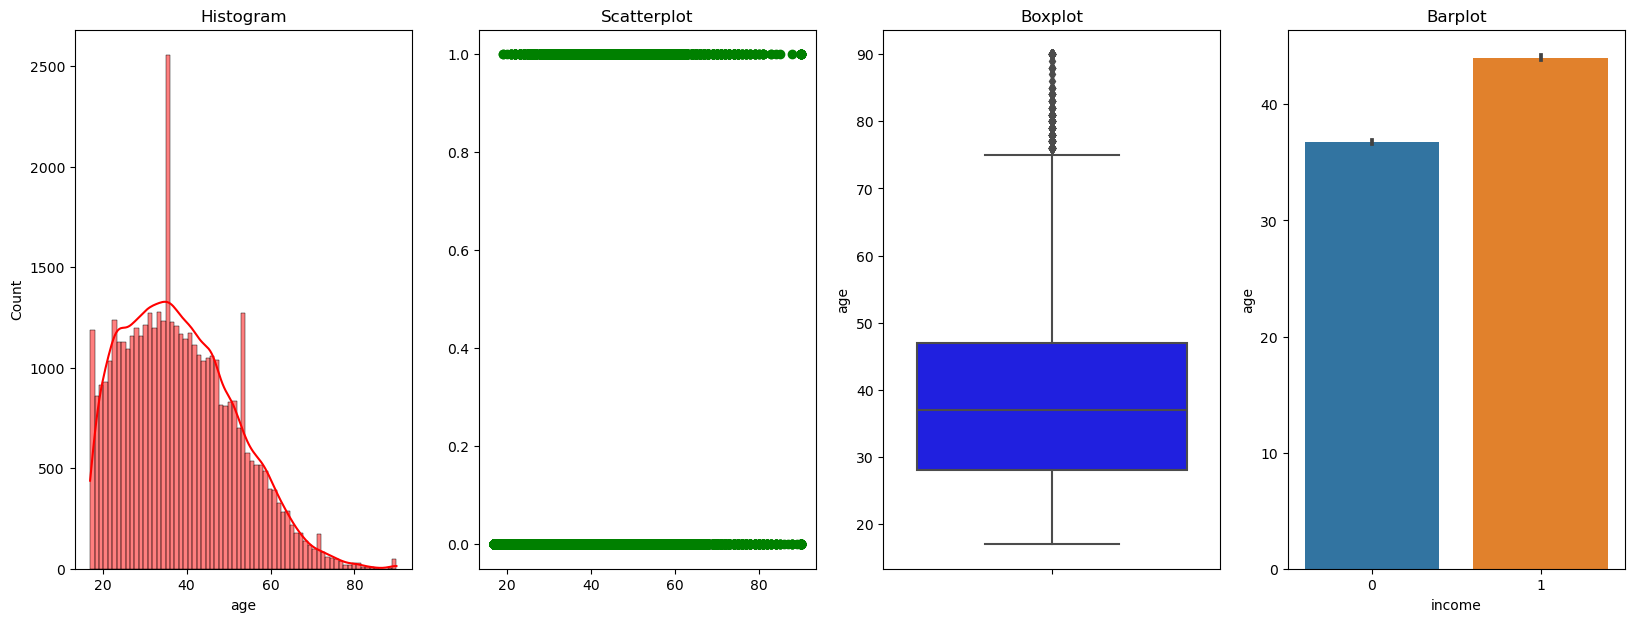

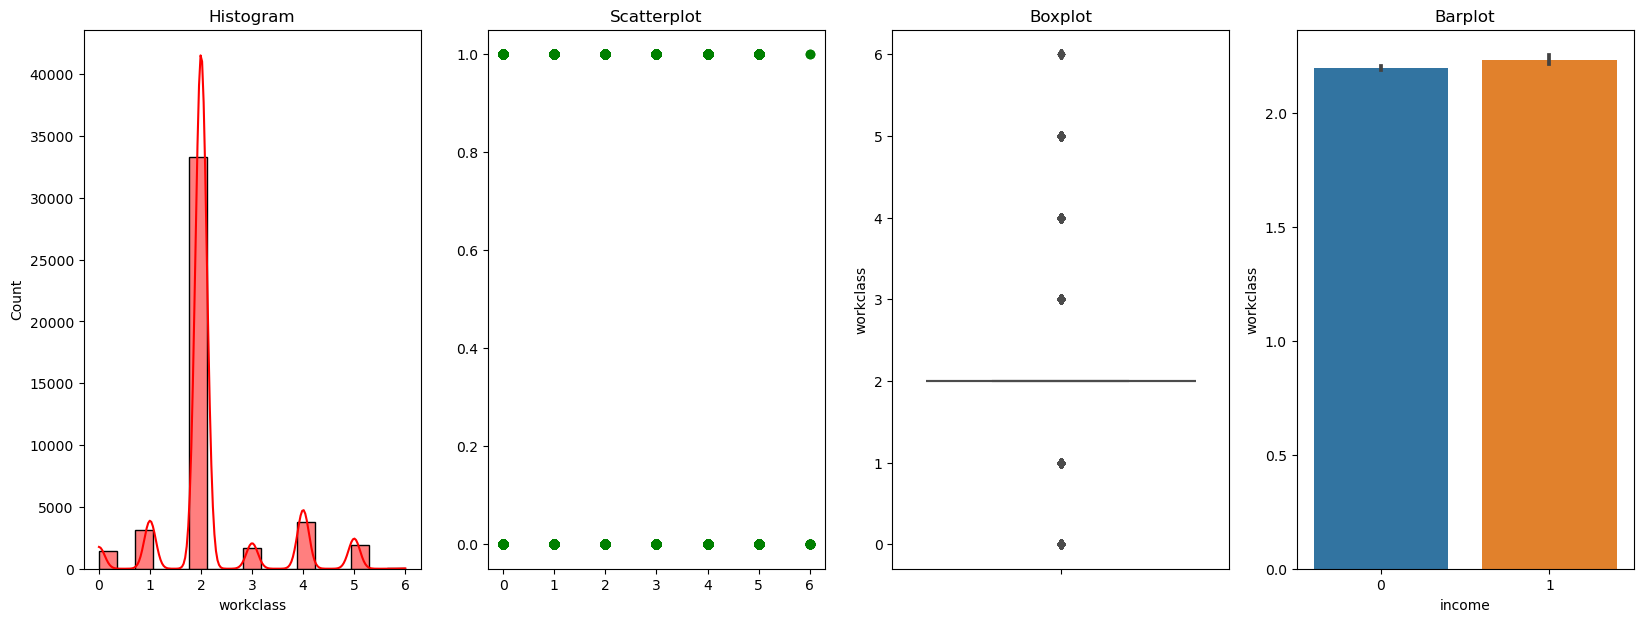

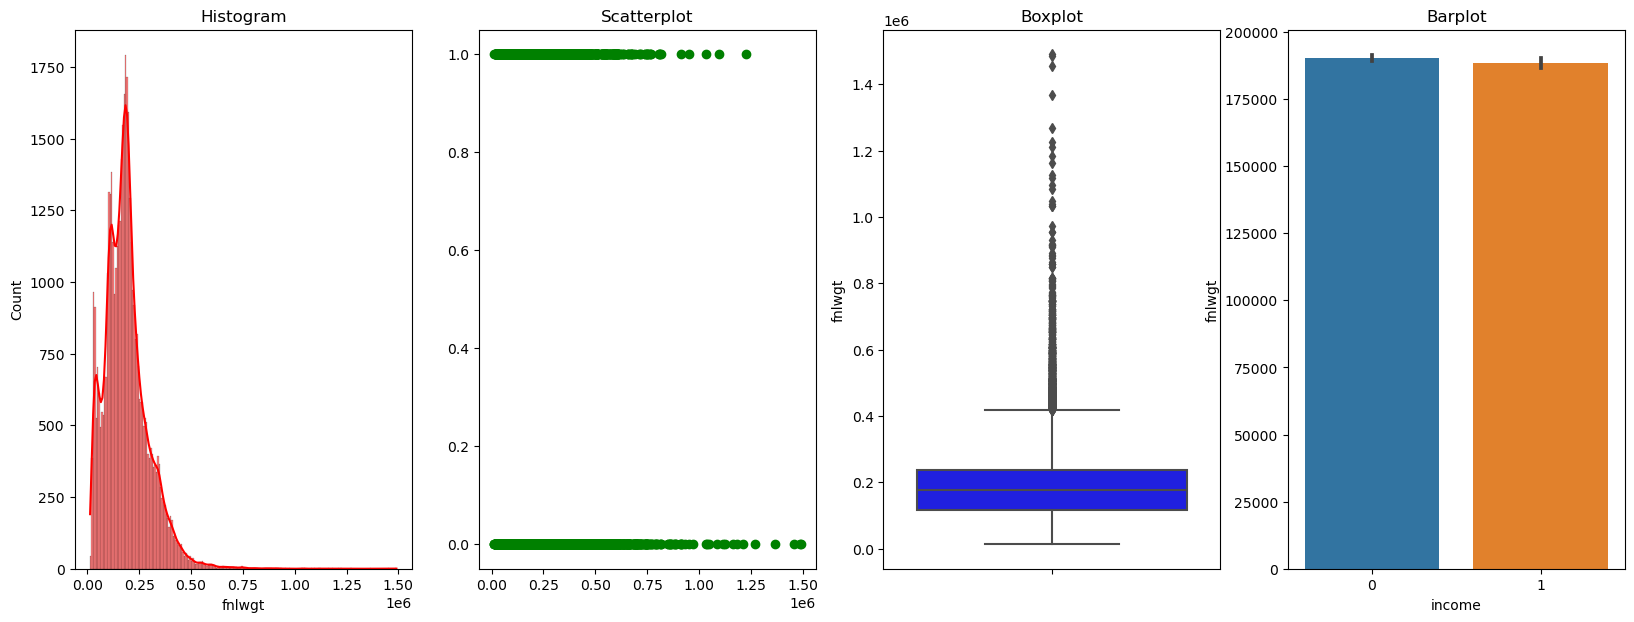

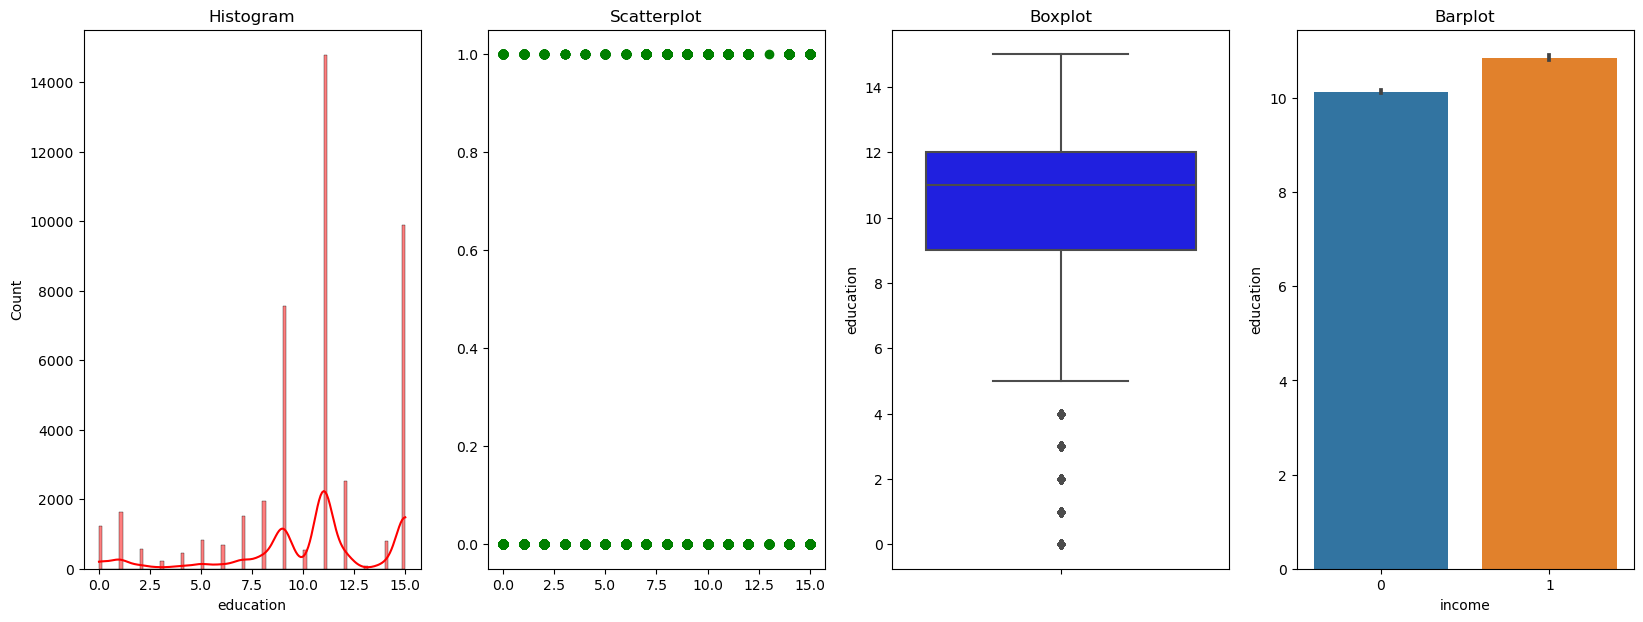

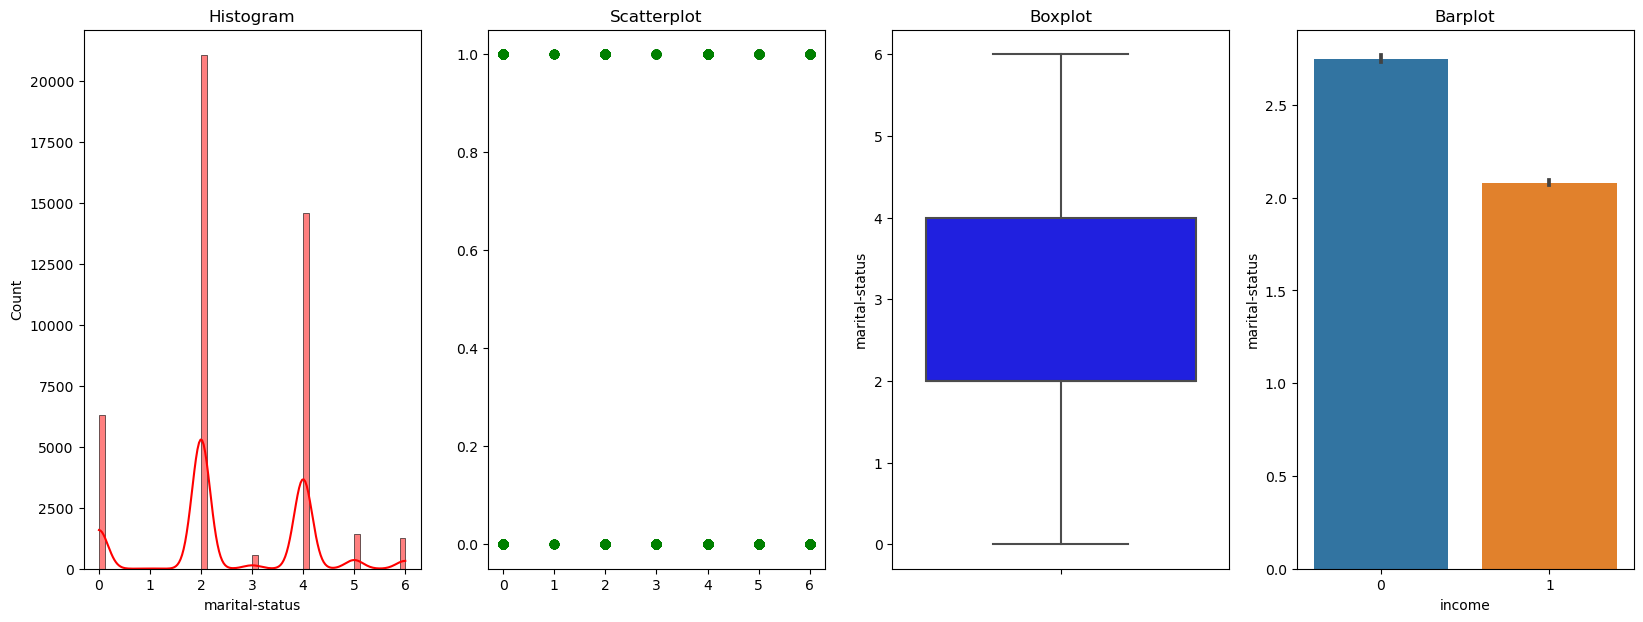

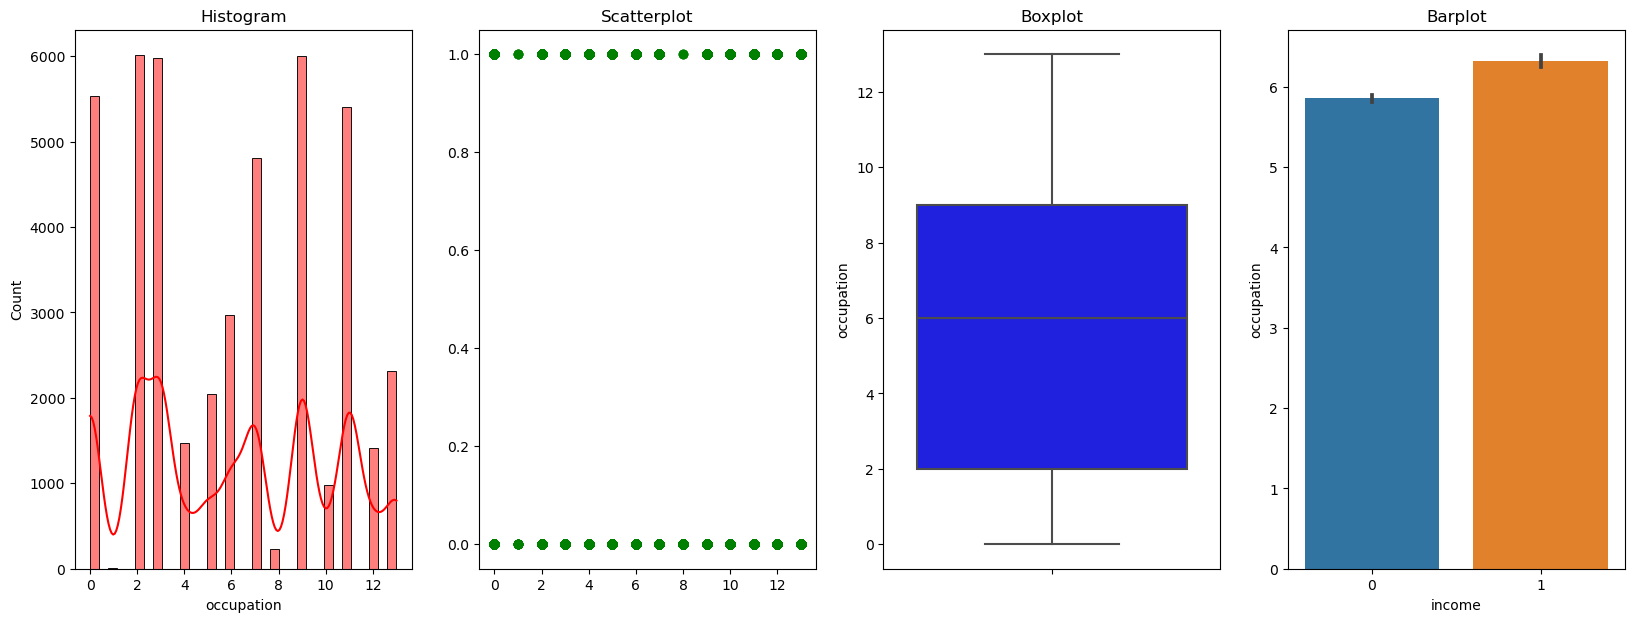

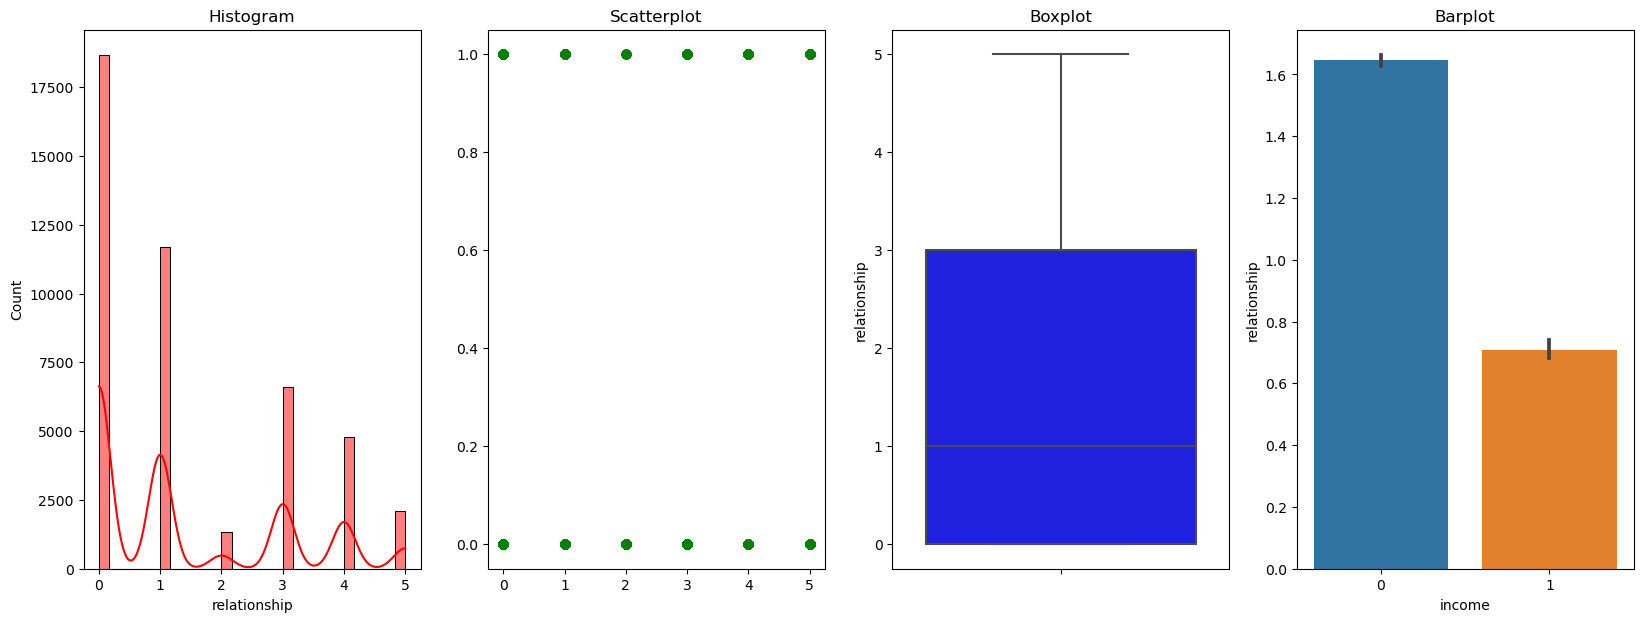

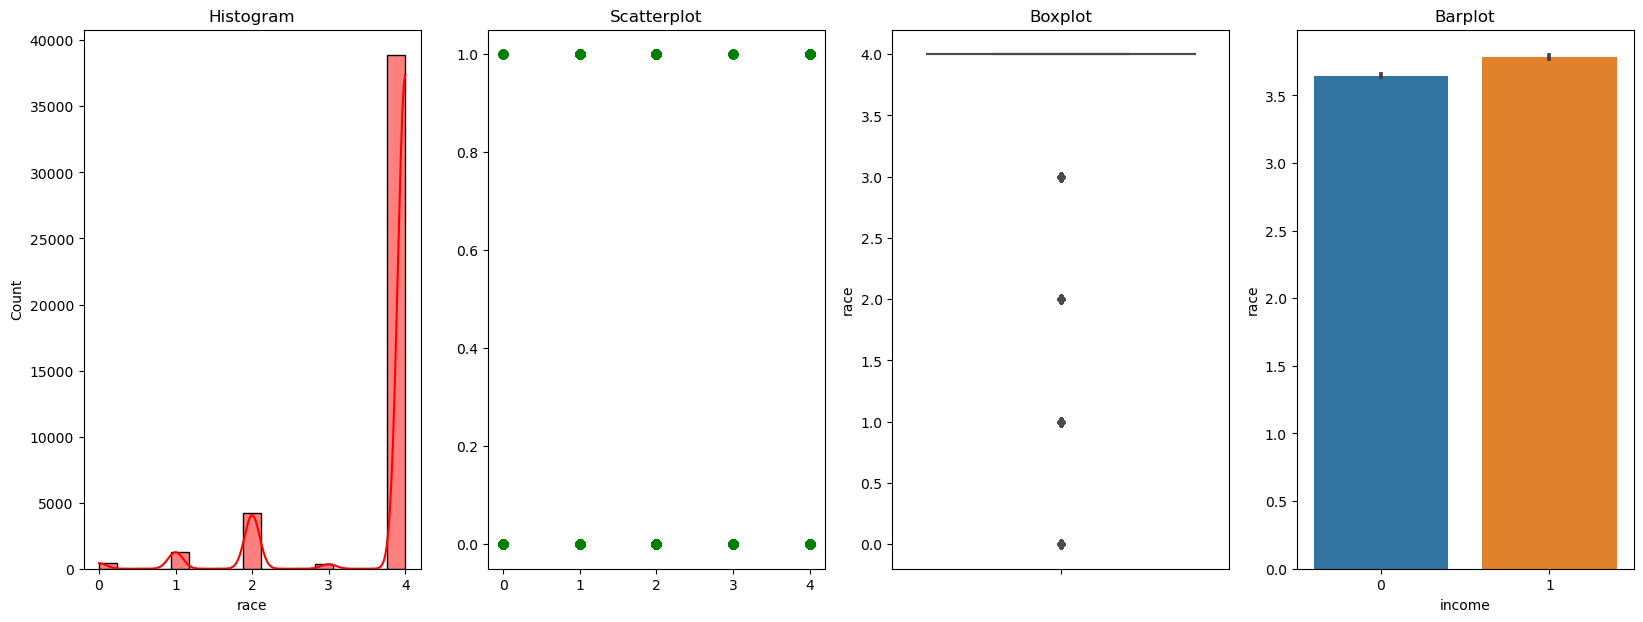

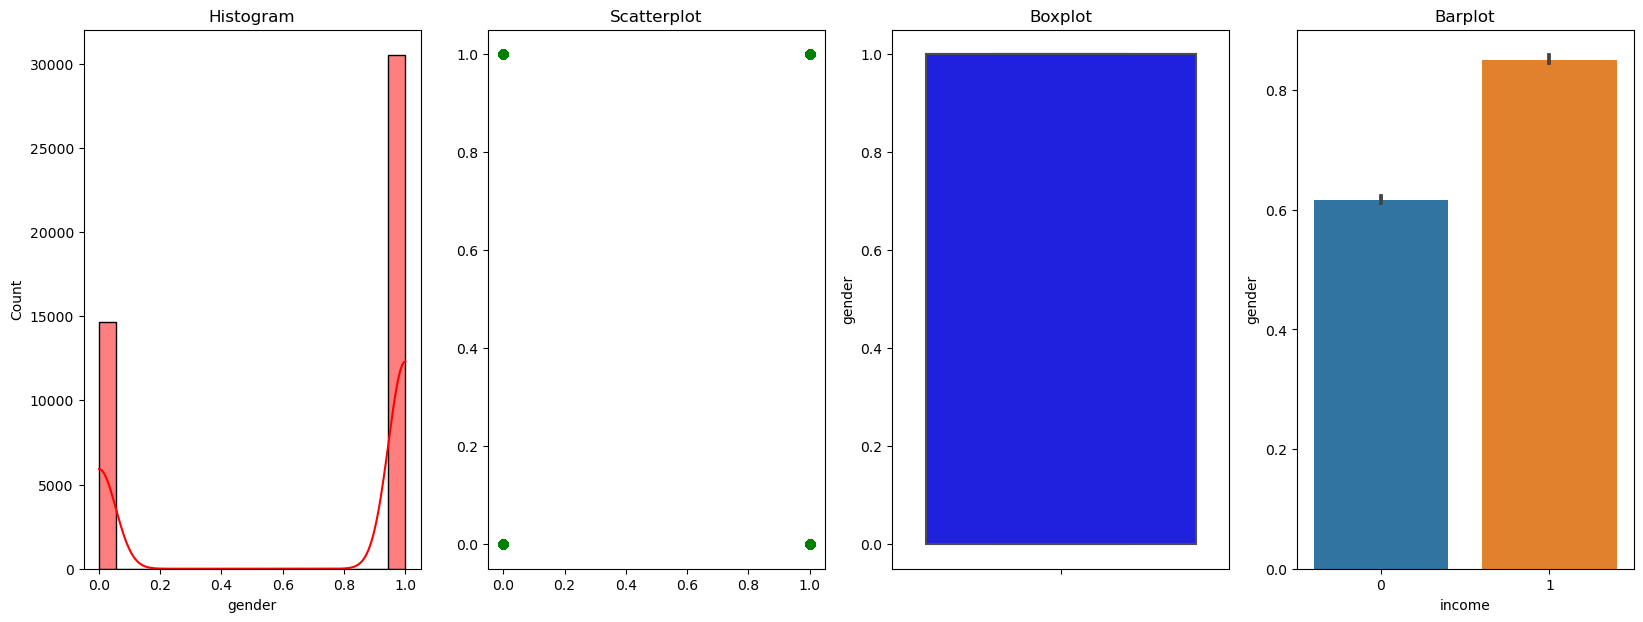

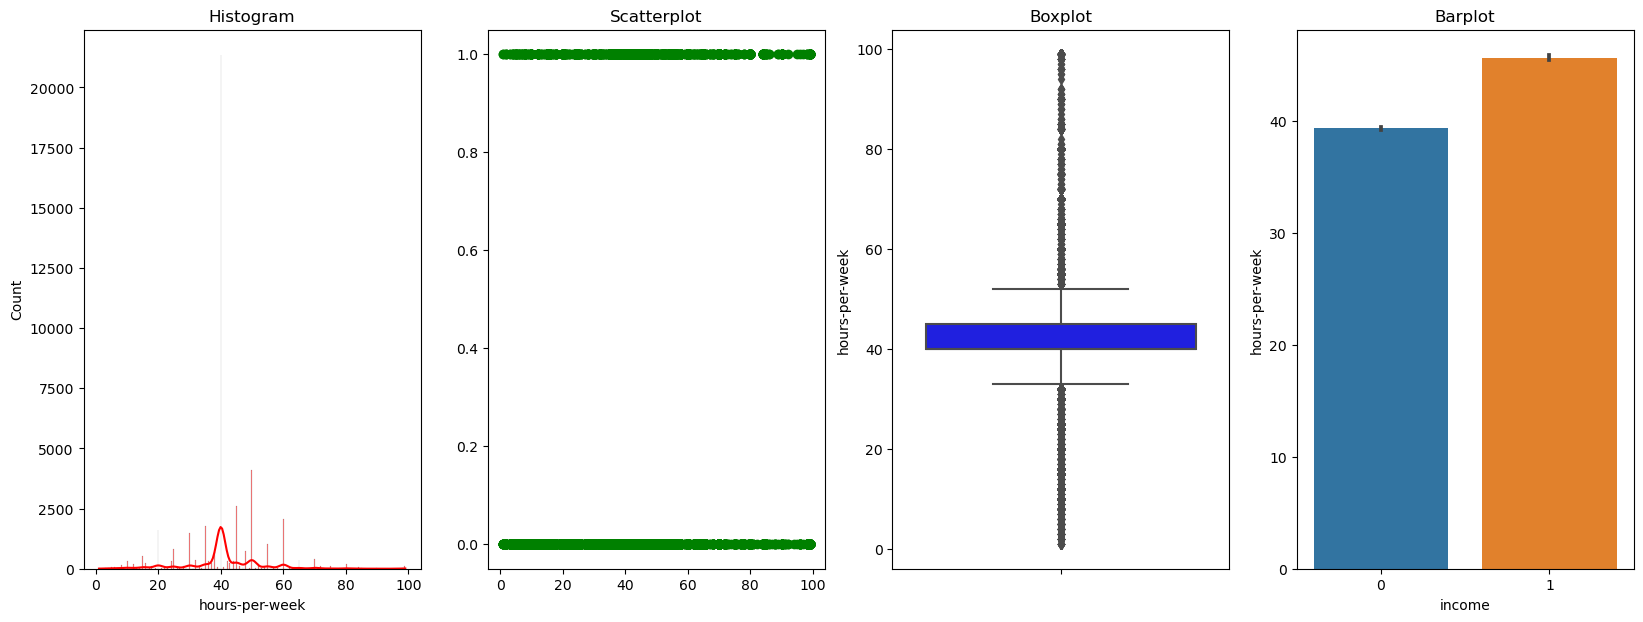

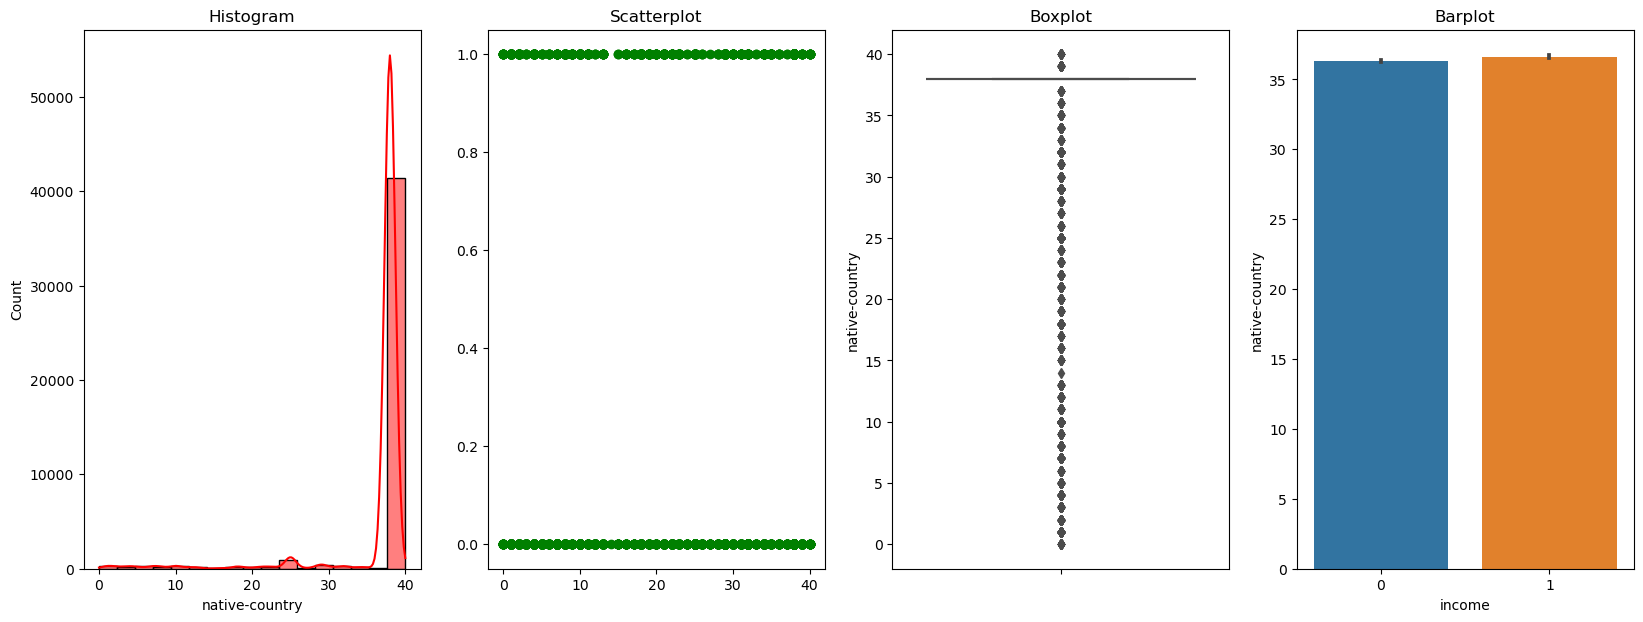

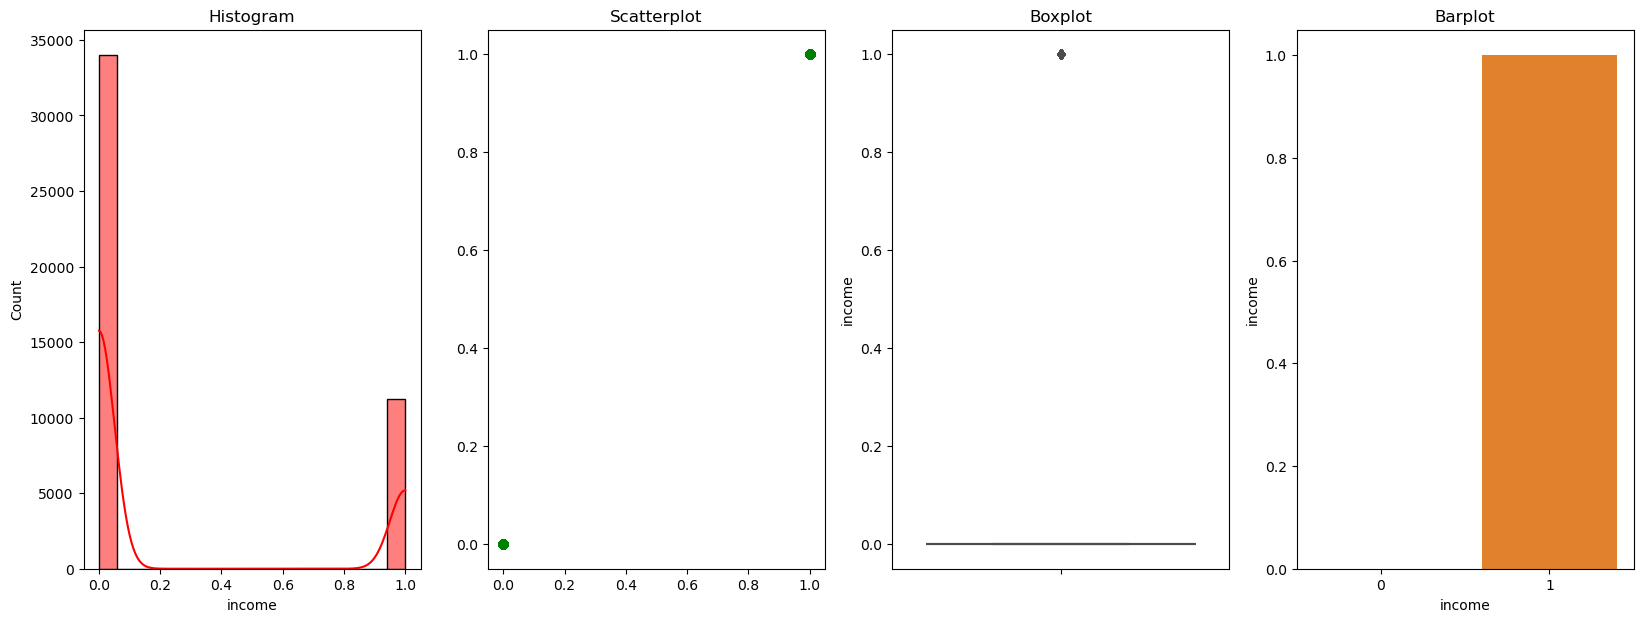

In [18]:
for col in df1:
    diagnostic_plots(df1,col,'income')

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
X = df1.drop(columns={"income"},axis=1)
y =df1["income"].values.reshape(-1,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print("X_train şekli:", X_train.shape)
print("y_train şekli:", y_train.shape)
print("X_test şekli:", X_test.shape)
print("y_test şekli:", y_test.shape)

X_train şekli: (40657, 11)
y_train şekli: (40657, 1)
X_test şekli: (4518, 11)
y_test şekli: (4518, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [23]:
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

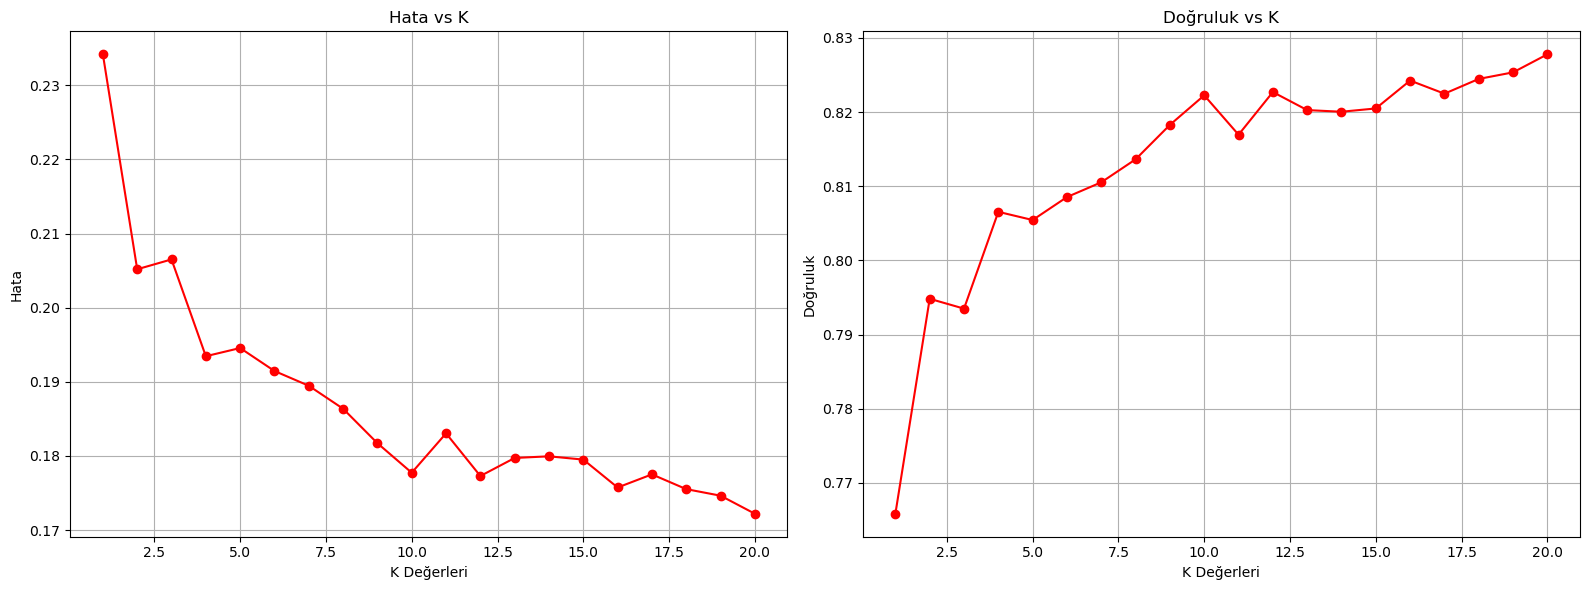

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), error, 'r-', marker='o')  
plt.xlabel('K Değerleri')  
plt.ylabel('Hata') 
plt.grid(True)  
plt.title('Hata vs K') 

plt.subplot(1, 2, 2)
plt.plot(range(1, 21), accuracy, 'r-', marker='o')  
plt.xlabel('K Değerleri') 
plt.ylabel('Doğruluk') 
plt.grid(True)  
plt.title('Doğruluk vs K')  

plt.tight_layout()  
plt.show() 

In [25]:
K = 20
clf = KNeighborsClassifier(n_neighbors=K) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Doğruluk:", metrics.accuracy_score(y_test, y_pred))  

Doğruluk: 0.8277999114652501


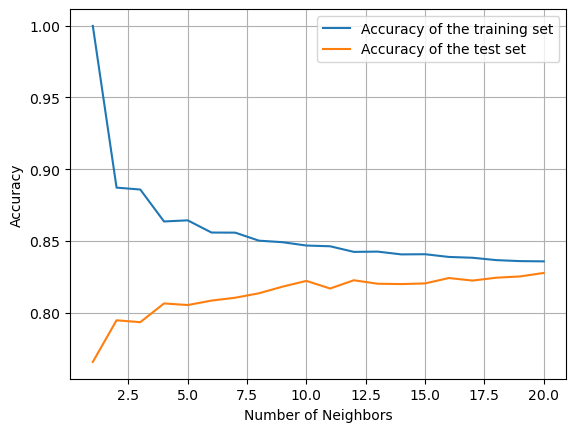

In [26]:
training_acc = []
test_acc = []

neighbors_setting = range(1,21)
for n_neighbors in neighbors_setting:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
    knn.fit(X_train,y_train.ravel())
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

parameters = {"n_neighbors": range(1, 30)}
grid_kn = GridSearchCV(estimator=KNeighborsClassifier(), 
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=10,  
                       verbose=1, 
                       n_jobs=-1  
                       )
grid_kn.fit(X_train_scaled, y_train.ravel())

Fitting 10 folds for each of 29 candidates, totalling 290 fits
